### This notebook looks at different plotting libraries (folium, matplotlib.pyplot, plotly)

In [1]:
import pandas as pd 
import geopandas as gpd

I deleted this file but this data can be downloaded from the NYC Open Data website 

In [2]:
# Subset of NTA dataset (Queens)
df = pd.read_csv("2020_Neighborhood_Tabulation_Areas_(NTAs)_20260125.csv")

In [3]:
df['the_geom'] = gpd.GeoSeries.from_wkt(df["the_geom"])
gdf = gpd.GeoDataFrame(df, geometry="the_geom")

In [5]:
gdf.head()

,BoroCode,BoroName,CountyFIPS,NTA2020,NTAName,NTAAbbrev,NTAType,CDTA2020,CDTAName,Shape_Length,Shape_Area,the_geom
0,4,Queens,81,QN0101,Astoria (North)-Ditmars-Steinway,Astr_N,0,QN01,QN01 Astoria-Queensbridge (CD 1 Equivalent),"47,392.9789879","58,301,779.7098","MULTIPOLYGON (((-73.90647 40.79018, -73.90251 ..."
1,4,Queens,81,QN0102,Old Astoria-Hallets Point,OldAstr,0,QN01,QN01 Astoria-Queensbridge (CD 1 Equivalent),"15,102.2622804","11,091,067.3494","MULTIPOLYGON (((-73.92828 40.7769, -73.92785 4..."
2,4,Queens,81,QN0103,Astoria (Central),Astr_C,0,QN01,QN01 Astoria-Queensbridge (CD 1 Equivalent),"21,571.9915364","21,084,822.1142","MULTIPOLYGON (((-73.91194 40.76901, -73.9145 4..."
3,4,Queens,81,QN0104,Astoria (East)-Woodside (North),Astr_E,0,QN01,QN01 Astoria-Queensbridge (CD 1 Equivalent),"24,360.9286823","26,041,929.9836","MULTIPOLYGON (((-73.90203 40.76742, -73.90218 ..."
4,4,Queens,81,QN0105,Queensbridge-Ravenswood-Dutch Kills,Qnsbrdg,0,QN01,QN01 Astoria-Queensbridge (CD 1 Equivalent),"27,093.7842312","27,721,573.6097","MULTIPOLYGON (((-73.93453 40.77118, -73.93425 ..."


In [ ]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'Map of Queens with Matplotlib'}>

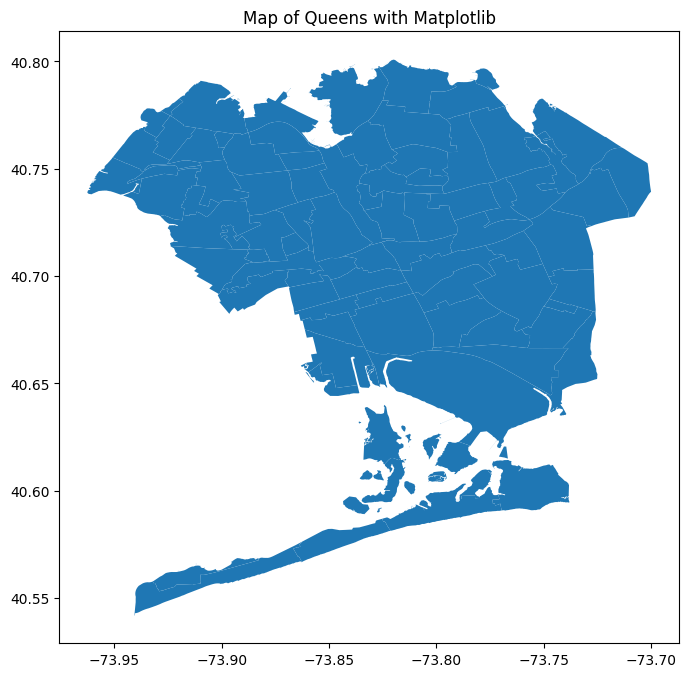

In [11]:
fig,ax = plt.subplots(1,1, figsize=(8,8))
plt.title("Map of Queens with Matplotlib")
gdf.plot(ax=ax)

## Create Folium Map

In [ ]:
import folium

In [12]:
m = folium.Map(location=[40.70, -73.94], zoom_start=10, tiles="CartoDB positron")
m

### Overlay Queens Boroughs to Map

In [14]:
for _, r in df.iterrows():
    # Returns a simplified representation of each geometry 
    sim_geo = gpd.GeoSeries(r["the_geom"]).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "blue"})

    # Create a popup for each neighborhood 
    folium.Popup(r['NTAName']).add_to(geo_j)

    geo_j.add_to(m)
m

In [16]:
# Add more popups 
for _, r in df.iterrows():
    # Returns a simplified representation of each geometry 
    sim_geo = gpd.GeoSeries(r["the_geom"]).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "blue"})

    # Create a popup for each neighborhood 
    folium.Popup("5").add_to(geo_j)

    geo_j.add_to(m)

m

## Plotly Map

In [3]:
import json
import plotly.express as px

In [4]:
df['the_geom'] = gpd.GeoSeries.from_wkt(df["the_geom"])
gdf = gpd.GeoDataFrame(df, geometry="the_geom")

In [5]:
gdf["NTA2020"] = gdf["NTA2020"].astype(str)
geojson = json.loads(gdf.to_json())

In [41]:
gdf["NTAName"]

0                 Astoria (North)-Ditmars-Steinway
1                        Old Astoria-Hallets Point
2                                Astoria (Central)
3                  Astoria (East)-Woodside (North)
4              Queensbridge-Ravenswood-Dutch Kills
                          ...                     
77                    Flushing Meadows-Corona Park
78                                     Forest Park
79           John F. Kennedy International Airport
80                              Jamaica Bay (East)
81    Jacob Riis Park-Fort Tilden-Breezy Point Tip
Name: NTAName, Length: 82, dtype: object

In [42]:
geojson["features"][0]

{'id': '0',
 'type': 'Feature',
 'properties': {'BoroCode': 4,
  'BoroName': 'Queens',
  'CountyFIPS': 81,
  'NTA2020': 'QN0101',
  'NTAName': 'Astoria (North)-Ditmars-Steinway',
  'NTAAbbrev': 'Astr_N',
  'NTAType': 0,
  'CDTA2020': 'QN01',
  'CDTAName': 'QN01 Astoria-Queensbridge (CD 1 Equivalent)',
  'Shape_Length': '47,392.9789879',
  'Shape_Area': '58,301,779.7098'},
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[-73.90647314610091, 40.790181175208154],
     [-73.90251173701, 40.789472084023124],
     [-73.90239936084132, 40.78955162018336],
     [-73.90206327886824, 40.7894944054953],
     [-73.90203428533837, 40.78941468642669],
     [-73.90169686089959, 40.78932032382399],
     [-73.90077375825614, 40.78914381825111],
     [-73.90032629743816, 40.789007662825725],
     [-73.90010759305294, 40.78885048909396],
     [-73.89961637941789, 40.78840049623647],
     [-73.89924748492737, 40.78814865912327],
     [-73.89783180103451, 40.78718217039352],
     [-73.89725536651

In [10]:
fig = px.choropleth_map(
    gdf,
    geojson=geojson,
    locations="NTA2020",
    featureidkey="properties.NTA2020",
    color_discrete_sequence=["#4C72B0"],  # Single color for now 
    map_style="carto-positron",
    zoom=10,
    center={
        "lat": gdf.geometry.centroid.y.mean(),
        "lon": gdf.geometry.centroid.x.mean(),
    },
    hover_name="NTAName",
    hover_data={
        "NTA2020": False,     # ID won't popup when hovered 
    }
)

# The address with the 10th most power outages complaints 
fig.add_scattermap(
    lat=[40.579518],
    lon=[-73.83595],
    mode="markers",
    marker=dict(
        size=12,
        color="red"
    ),
    name="My point",
    hovertext="179 BEACH 115 STREET",
    hoverinfo="text",
)

# fig.update_traces(marker_line_width=0.5)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Open in browser 
fig.write_html("neighborhoods.html", auto_open=True)

### Concluding Remarks

Though both Folium and Plotly offer interactive plots, Plotly's hover functionality is better. 